In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk 

In [14]:
path="https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Classification/Bank.csv"

In [15]:
data=pd.read_csv(path)
data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no


In [16]:
data1=data.drop('Unnamed: 0',axis=1)
#df = data.reindex(data.index.drop(0)).reset_index(drop=True)
#data.drop(0)
#data.to_csv(data,header=False,index=False)
new_header = data1.iloc[0] 
df = data1[1:] 
df.columns = new_header
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [17]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4517,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4518,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4519,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4520,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4521,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [18]:
df.isnull().sum()

0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

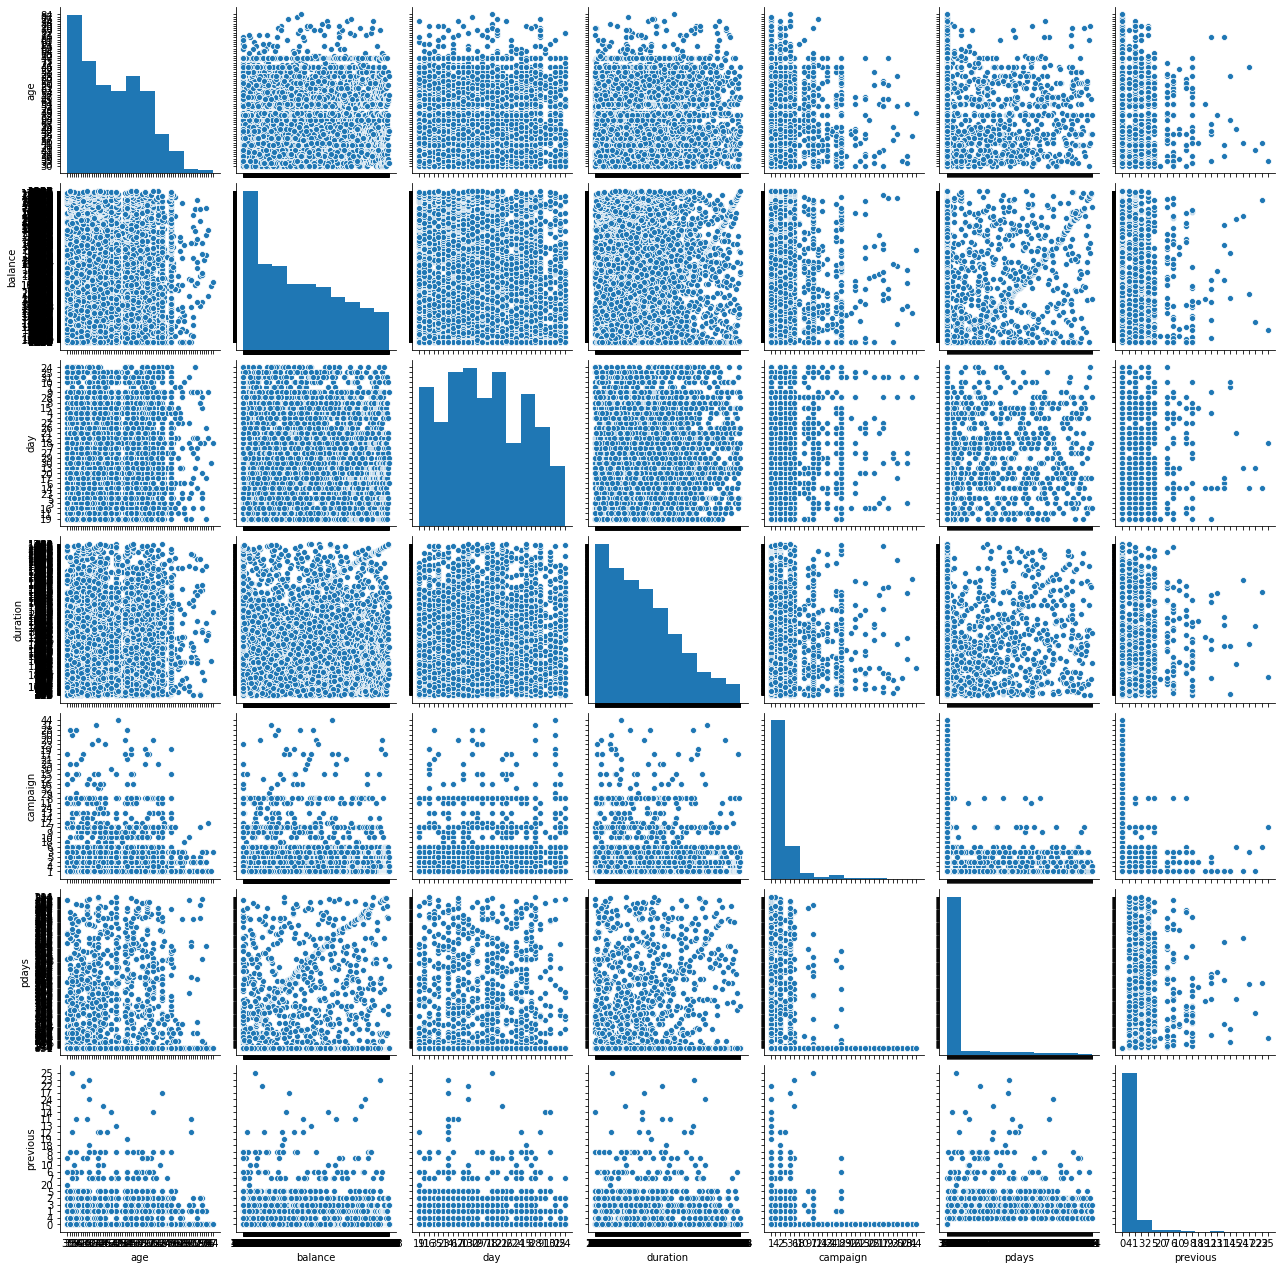

In [19]:
sns.pairplot(df)

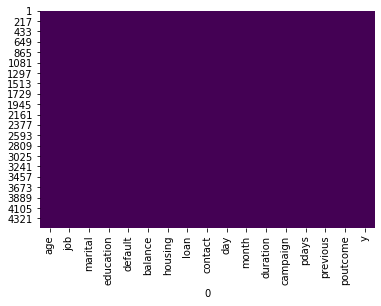

In [20]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [21]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object', name=0)

In [22]:
# Species distribution
print(df.groupby('y').size())

y
no     4000
yes     521
dtype: int64


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 1 to 4521
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   object
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   object
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   object
 10  month      4521 non-null   object
 11  duration   4521 non-null   object
 12  campaign   4521 non-null   object
 13  pdays      4521 non-null   object
 14  previous   4521 non-null   object
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: object(17)
memory usage: 600.6+ KB


In [24]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no


In [29]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['job']= label_encoder.fit_transform(df['job'])
df['job'].unique() 
df['marital']=label_encoder.fit_transform(df['marital'])
df['marital'].unique() 
df['education']=label_encoder.fit_transform(df['education'])
df['education'].unique() 
df['default']=label_encoder.fit_transform(df['default'])
df['default'].unique() 
df['housing']=label_encoder.fit_transform(df['housing'])
df['housing'].unique() 
df['loan']=label_encoder.fit_transform(df['loan'])
df['loan'].unique() 
df['contact']=label_encoder.fit_transform(df['contact'])
df['contact'].unique() 
df['month']=label_encoder.fit_transform(df['month'])
df['month'].unique() 
df['poutcomet']=label_encoder.fit_transform(df['poutcome'])
df['poutcome'].unique() 
df['y']=label_encoder.fit_transform(df['y'])
df['y'].unique() 


/home/manikanta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/manikanta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/manikanta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

array([0, 1])

In [33]:
data2=df.drop('poutcome',axis=1)
data2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,poutcomet
1,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,0,3
2,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
3,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
4,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,0,3
5,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,0,3


In [37]:
data2['marital'].value_counts()

1    2797
2    1196
0     528
Name: marital, dtype: int64

In [39]:
data2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'y', 'poutcomet'],
      dtype='object', name=0)

In [80]:
x=data2[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing','loan', 'contact',
              'day', 'month', 'duration', 'campaign', 'pdays',
               'previous','poutcomet']]
y=data2['y']

In [81]:
# Logistic Algorithm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV,RidgeCV,Ridge,Lasso,ElasticNet

In [82]:
model=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=4)

In [83]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3164, 16)
(3164,)
(1357, 16)
(1357,)


In [84]:
model.fit(x_train,y_train)

/home/manikanta/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
train_score=model.score(x_train,y_train)
train_score

0.8871681415929203

In [86]:
test_score=model.score(x_test,y_test)
test_score

0.8901989683124539

In [87]:
y_predict_prob = model.predict_proba(x_test)[:, 1]

In [88]:
y_predict_prob

array([0.1255729 , 0.12484585, 0.07514659, ..., 0.13902441, 0.10053963,
       0.32374794])

In [89]:
pd.DataFrame({'Acutual Data':y_test,'New_prediction':y_predict_prob})

,Acutual Data,New_prediction
3319,0,0.125573
157,1,0.124846
4243,0,0.075147
4423,0,0.277683
395,0,0.182325
...,...,...
1457,0,0.043503
3244,0,0.088784
1737,1,0.139024
3697,0,0.100540


In [90]:
import joblib
joblib.dump(model,"model/LogisticRegression_Bank_dataSet1.pkl")

['model/LogisticRegression_Bank_dataSet1.pkl']

In [100]:
#KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
k=5
model1=KNeighborsClassifier(n_neighbors=k)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=4)

In [101]:
model1.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [102]:
model1.classes_

array([0, 1])

In [103]:
trine_score=model1.score(x_train,y_train)
trine_score

0.9

In [104]:
test_score=model1.score(x_test,y_test)
test_score

0.8770999115826702

In [108]:
y_predict_knn = model.predict_proba(x_test)[:,1]

In [109]:
y_predict_knn

array([0.1255729 , 0.12484585, 0.07514659, ..., 0.0656906 , 0.10052354,
       0.05002829])

In [110]:
pd.DataFrame({'Acutual Data':y_test,'New_prediction':y_predict_knn})

,Acutual Data,New_prediction
3319,0,0.125573
157,1,0.124846
4243,0,0.075147
4423,0,0.277683
395,0,0.182325
...,...,...
3363,0,0.316330
3026,0,0.187921
1544,0,0.065691
3742,0,0.100524


In [111]:
joblib.dump(model1,'model/KNNClassifier_BankDataset.pkl')

['model/KNNClassifier_BankDataset.pkl']

In [121]:
# Navie bayes Algorithm
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=4)
model2=GaussianNB()
model2.fit(x_train,y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [122]:
train_score=model2.score(x_train,y_train)
trine_score

0.9

In [123]:
test_score=model2.score(x_test,y_test)
test_score

0.8271356783919598

In [126]:
y_pred_nb=model2.predict(x_test)
y_pred_nb[0:5]

array([1, 0, 0, 0, 1])

In [127]:
pd.DataFrame({"Actual_Data":y_test,"New_Predict":y_pred_nb})

,Actual_Data,New_Predict
3319,0,1
157,1,0
4243,0,0
4423,0,0
395,0,1
...,...,...
2516,0,0
2008,0,0
3760,0,0
4343,1,0


In [128]:
joblib.dump(model2,'model/GNB_classification_BankDataset.pkl')

['model/GNB_classification_BankDataset.pkl']

In [139]:
#SVM Algorithm
from sklearn import svm
model3=svm.SVC(gamma='auto',probability=True,kernel='rbf')
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)
model3.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [140]:
train_score=model3.score(x_train,y_train)
train_score

1.0

In [141]:
test_score=model3.score(x_test,y_test)
test_score

0.876243093922652

In [143]:
y_pred_svm=model.predict(x_test)
y_pred_svm[0:8]

array([0, 0, 0, 0, 0, 0, 0, 1])

In [144]:
pd.DataFrame({"Actual_Data":y_test,"New_Predict":y_pred_svm})

,Actual_Data,New_Predict
4275,0,0
73,0,0
1066,0,0
3186,0,0
131,0,0
...,...,...
1524,0,0
2592,0,0
1225,0,0
3072,0,0


In [145]:
joblib.dump(model3,'model/SVMclassfier_bank_dataset.pkl')

['model/SVMclassfier_bank_dataset.pkl']

In [153]:
#Decision Tree Algorithm
from sklearn import tree
model4 = tree.DecisionTreeClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
model4 = model4.fit(x_train,y_train)
model4

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [154]:
trine_score=model4.score(x_train,y_train)
trine_score

1.0

In [155]:
test_score=model4.score(x_test,y_test)
test_score

0.8709106984969054

In [156]:
y_pred_dt=model4.predict(x_test)
y_pred_dt

array([0, 0, 0, ..., 0, 0, 0])

In [157]:
pd.DataFrame({"Actual_Data":y_test,"New_Predict":y_pred_dt})

,Actual_Data,New_Predict
4275,0,0
73,0,0
1066,0,0
3186,0,0
131,0,0
...,...,...
1791,0,0
2107,0,1
243,0,0
4403,1,0


In [158]:
joblib.dump(model4,'model/DTclassifier_bank_dataset.pkl')

['model/DTclassifier_bank_dataset.pkl']

[Text(222.46566916661646, 212.71304347826086, 'X[11] <= 631.5\ngini = 0.2\nsamples = 3390\nvalue = [3007, 383]'),
 Text(143.28444826573048, 203.2591304347826, 'X[11] <= 211.5\ngini = 0.148\nsamples = 3120\nvalue = [2869, 251]'),
 Text(67.27730532786886, 193.80521739130435, 'X[0] <= 19.5\ngini = 0.055\nsamples = 1913\nvalue = [1859, 54]'),
 Text(65.98588777724206, 184.3513043478261, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(68.56872287849566, 184.3513043478261, 'X[0] <= 70.5\ngini = 0.053\nsamples = 1911\nvalue = [1859, 52]'),
 Text(47.061071600771456, 174.89739130434782, 'X[15] <= 2.5\ngini = 0.047\nsamples = 1893\nvalue = [1847, 46]'),
 Text(23.406943105110898, 165.44347826086957, 'X[13] <= 102.5\ngini = 0.135\nsamples = 317\nvalue = [294, 23]'),
 Text(11.622757955641273, 155.98956521739132, 'X[13] <= 90.5\ngini = 0.457\nsamples = 48\nvalue = [31, 17]'),
 Text(5.165670202507233, 146.53565217391304, 'X[10] <= 2.0\ngini = 0.204\nsamples = 26\nvalue = [23, 3]'),
 Text(2.582835101

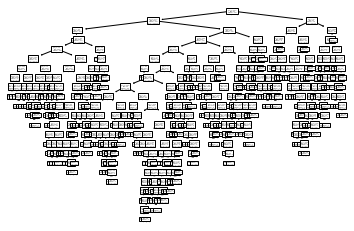

In [159]:
tree.plot_tree(model4)

In [176]:
#RandomForest Algorithm
from sklearn.ensemble import RandomForestClassifier
model5 = RandomForestClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=0)
model5.fit(x_train,y_train)
model5

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [177]:
train_score=model5.score(x_train,y_train)
train_score

1.0

In [178]:
test_score=model5.score(x_test,y_test)
test_score

0.9050772626931567

In [179]:
y_pred_rf=model5.predict(x_test)
y_pred_rf

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [180]:
pd.DataFrame({"Actual_Data":y_test,"New_Predict":y_pred_rf})

,Actual_Data,New_Predict
4275,0,0
73,0,0
1066,0,0
3186,0,0
131,0,0
...,...,...
2870,0,0
4400,0,0
1446,0,1
3356,0,0


In [181]:
joblib.dump(model5,'model/RFclassifier_bankdataser.pkl')

['model/RFclassifier_bankdataser.pkl']

In [189]:
#AdaBoosting Algorithm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.26,random_state=0)
model6 = AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=0))
model6.fit(x_train,y_train)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [190]:
train_score=model6.score(x_train,y_train)
train_score

1.0

In [191]:
test_score=model6.score(x_test,y_test)
test_score

0.8562925170068028

In [192]:
y_pred_adaboosting=model6.predict(x_test)
y_pred_adaboosting

array([0, 0, 0, ..., 0, 0, 0])

In [193]:
pd.DataFrame({"Actual_Data":y_test,"New_Predict":y_pred_adaboosting})

,Actual_Data,New_Predict
4275,0,0
73,0,0
1066,0,0
3186,0,0
131,0,0
...,...,...
4296,0,0
841,0,0
3007,1,0
4019,0,0


In [194]:
joblib.dump(model6,'model/AdaBoostingclassifier_bankdataset.pkl')

['model/AdaBoostingclassifier_bankdataset.pkl']